In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from google.colab import drive
# from google.colab import drive

df = pd.read_csv('american_bankruptcy.csv')

df = df.drop(columns = ['company_name'])
df = df.drop(columns = ['year'])

print(df.head(10))

Mounted at /content/drive
  status_label       X1        X2      X3       X4       X5      X6       X7  \
0        alive  511.267   833.107  18.373   89.031  336.018  35.163  128.348   
1        alive  485.856   713.811  18.577   64.367  320.590  18.531  115.187   
2        alive  436.656   526.477  22.496   27.207  286.588 -58.939   77.528   
3        alive  396.412   496.747  27.172   30.745  259.954 -12.410   66.322   
4        alive  432.204   523.302  26.680   47.491  247.245   3.504  104.661   
5        alive  474.542   598.172  27.950   61.774  255.477  15.453  127.121   
6        alive  624.454   704.081  29.222   91.877  323.592  35.163  136.272   
7        alive  645.721   837.171  32.199  118.907  342.593  58.660  181.691   
8        alive  783.431  1080.895  39.952  168.522  435.608  75.144  202.472   
9        alive  851.312  1110.677  40.551  166.080  477.424  78.651  227.300   

          X8        X9       X10      X11      X12      X13      X14      X15  \
0   372.7519

In [2]:
# Data Cleaning

missing_values = df.isnull().sum()
print('\nMissing values per column:\n', missing_values)

duplicates = df.duplicated().sum()
print('\nDuplicates in the dataset:', duplicates)


Missing values per column:
 status_label    0
X1              0
X2              0
X3              0
X4              0
X5              0
X6              0
X7              0
X8              0
X9              0
X10             0
X11             0
X12             0
X13             0
X14             0
X15             0
X16             0
X17             0
X18             0
dtype: int64

Duplicates in the dataset: 0


In [3]:
# Feature Encoding (With Binary Encoding)

print('\nLabels in the dataset:', df['status_label'].unique())

df['status_encoding'] = df['status_label'].map({'alive': 0, 'failed': 1})
df['status_encoding'] = df['status_encoding'].astype(int)
df = df.drop(columns = ['status_label'])
print(df.head(10))


Labels in the dataset: ['alive' 'failed']
        X1        X2      X3       X4       X5      X6       X7         X8  \
0  511.267   833.107  18.373   89.031  336.018  35.163  128.348   372.7519   
1  485.856   713.811  18.577   64.367  320.590  18.531  115.187   377.1180   
2  436.656   526.477  22.496   27.207  286.588 -58.939   77.528   364.5928   
3  396.412   496.747  27.172   30.745  259.954 -12.410   66.322   143.3295   
4  432.204   523.302  26.680   47.491  247.245   3.504  104.661   308.9071   
5  474.542   598.172  27.950   61.774  255.477  15.453  127.121   522.6794   
6  624.454   704.081  29.222   91.877  323.592  35.163  136.272   882.6283   
7  645.721   837.171  32.199  118.907  342.593  58.660  181.691  1226.1925   
8  783.431  1080.895  39.952  168.522  435.608  75.144  202.472   747.5434   
9  851.312  1110.677  40.551  166.080  477.424  78.651  227.300   571.5948   

         X9       X10      X11      X12      X13      X14      X15       X16  \
0  1024.333   740.

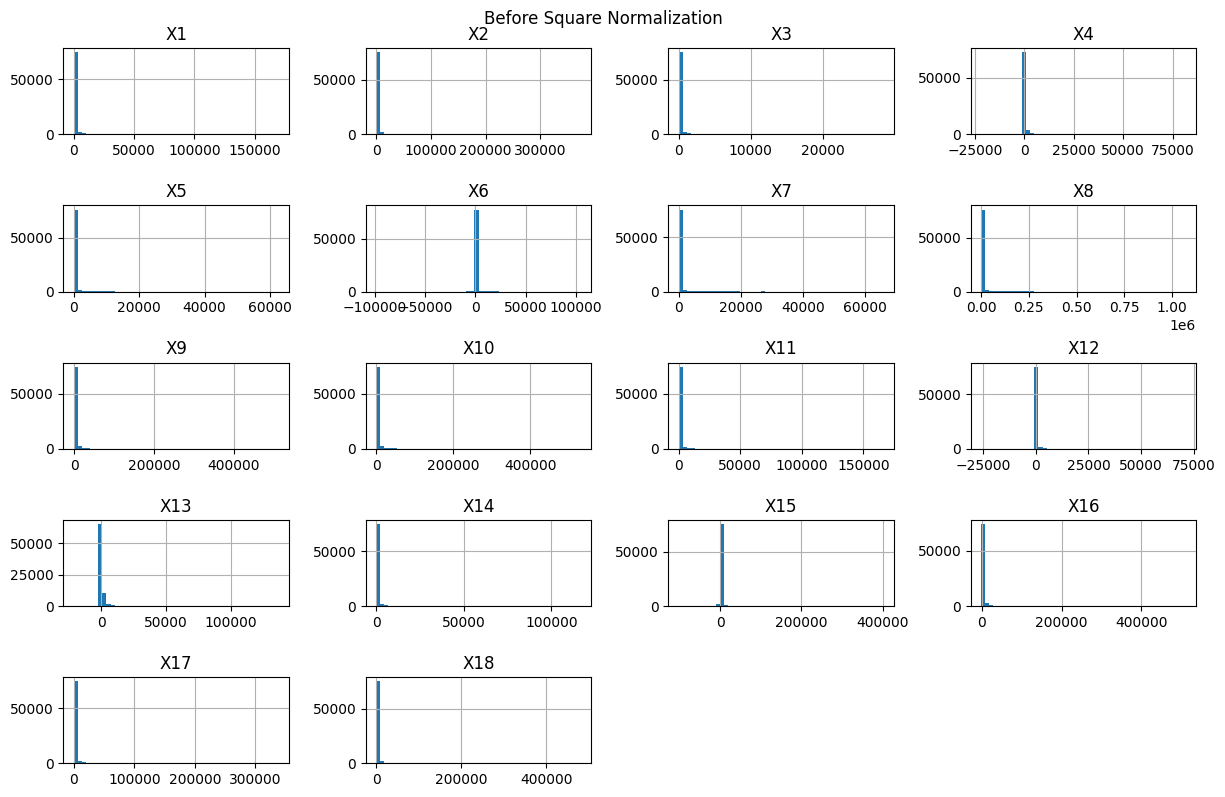

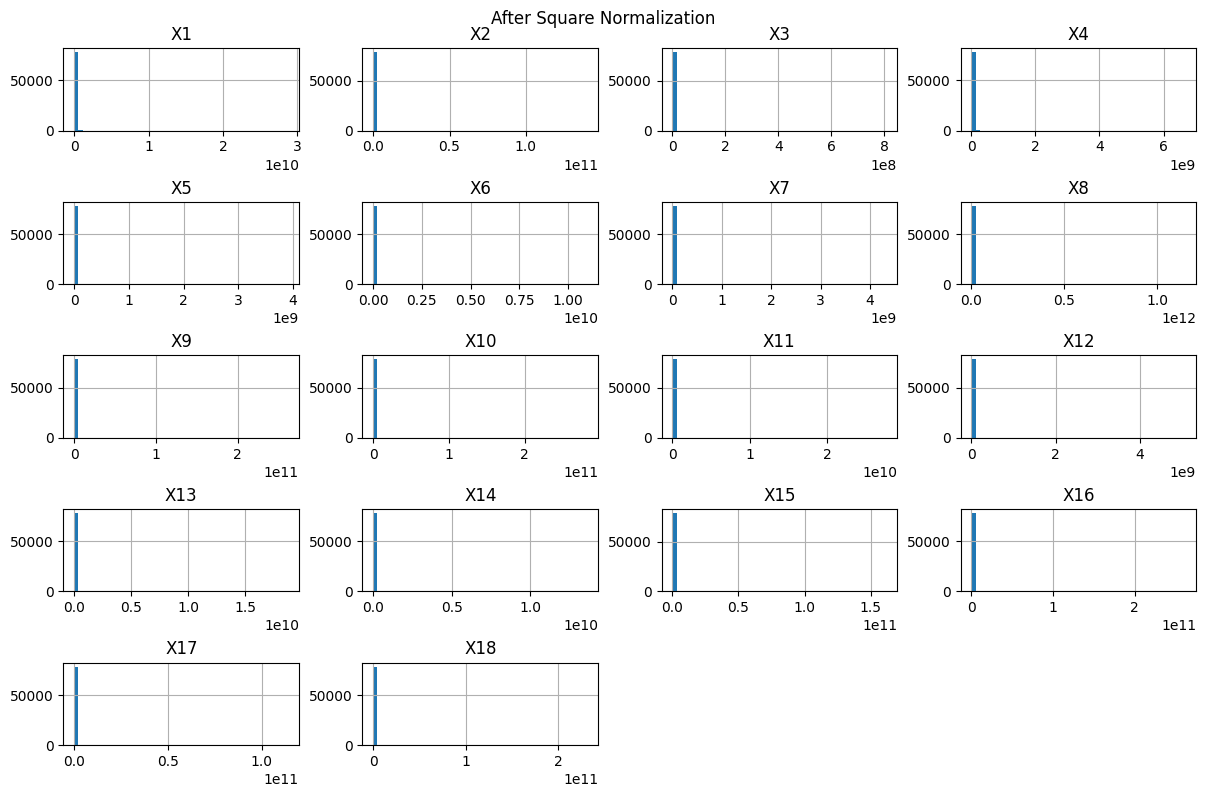

In [4]:
# Square Normalization

df_square = df.copy()

columns_to_normalize = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6',
                       'X7', 'X8', 'X9', 'X10', 'X11', 'X12',
                       'X13', 'X14', 'X15', 'X16', 'X17', 'X18']

# Visualize the data before applying the transformation
df_square[columns_to_normalize].hist(bins=50, figsize=(12, 8))
plt.suptitle('Before Square Normalization')
plt.tight_layout(pad=0.5)
plt.show()

# Apply the square transformation
for column in columns_to_normalize:
    df_square[column] = df_square[column].apply(lambda x: x**2)

# Visualize the data after the transformation
df_square[columns_to_normalize].hist(bins=50, figsize=(12, 8))
plt.suptitle('After Square Normalization')
plt.tight_layout(pad=0.5)
plt.show()

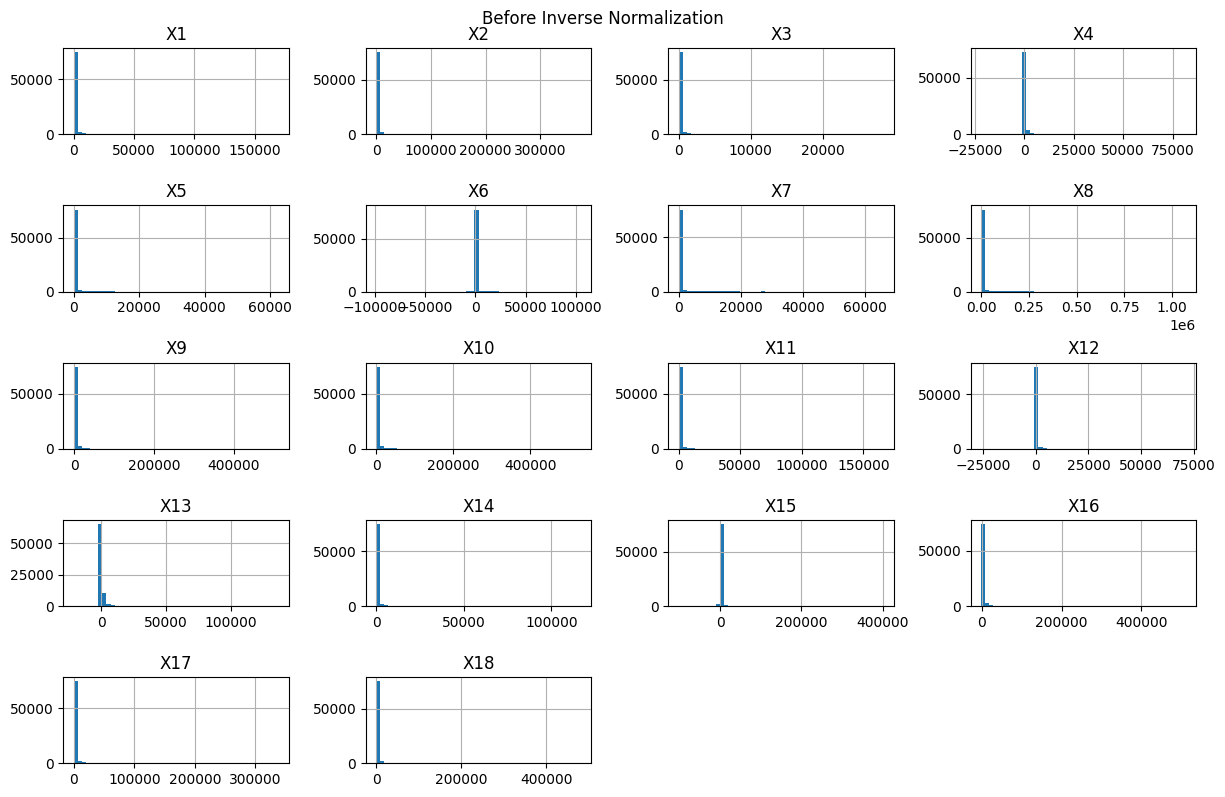

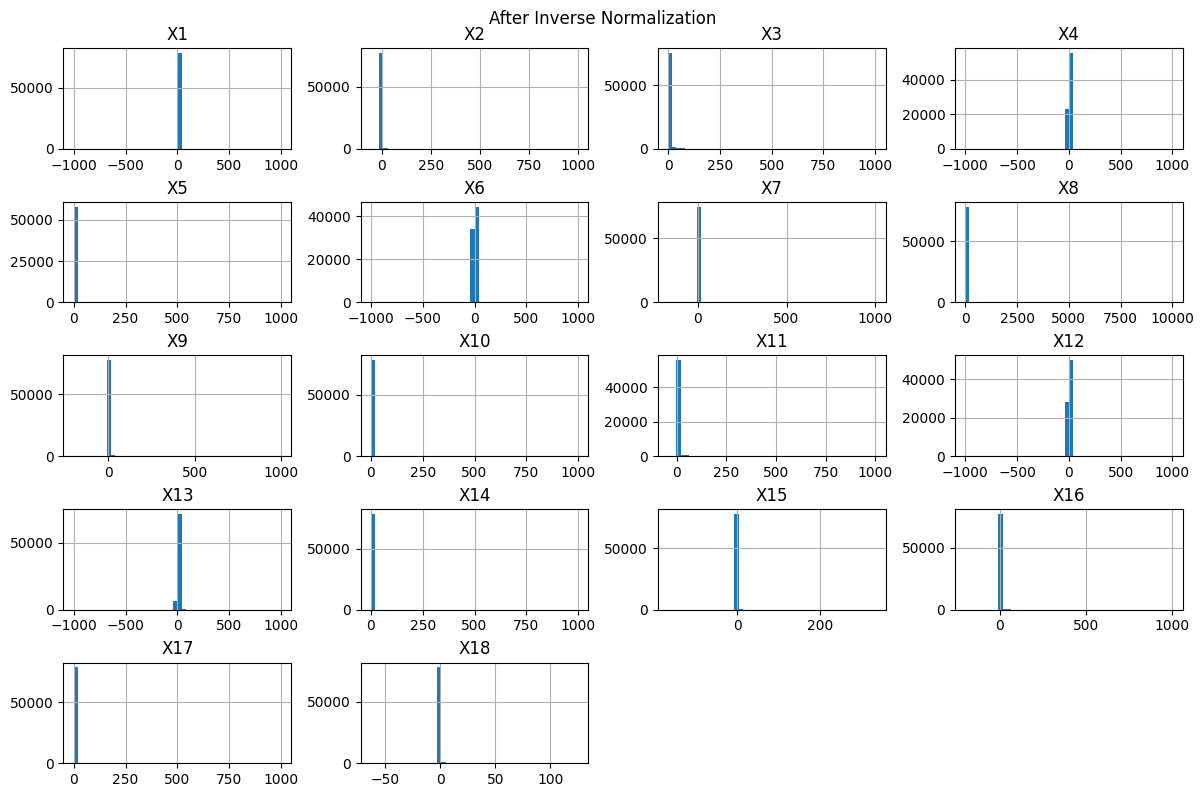

In [5]:
# Inverse Normalization

df_inverse = df.copy()

columns_to_normalize = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6',
                       'X7', 'X8', 'X9', 'X10', 'X11', 'X12',
                       'X13', 'X14', 'X15', 'X16', 'X17', 'X18']

# Visualize the data before the transformation
df_inverse[columns_to_normalize].hist(bins=50, figsize=(12, 8))
plt.suptitle('Before Inverse Normalization')
plt.tight_layout(pad=0.5)
plt.show()

# Apply the inverse transformation
for column in columns_to_normalize:
    df_inverse[column] = df_inverse[column].apply(lambda x: 1/x if x != 0 else np.nan)

# Visualize the data after the transformation
df_inverse[columns_to_normalize].hist(bins=50, figsize=(12, 8))
plt.suptitle('After Inverse Normalization')
plt.tight_layout(pad=0.5)
plt.show()

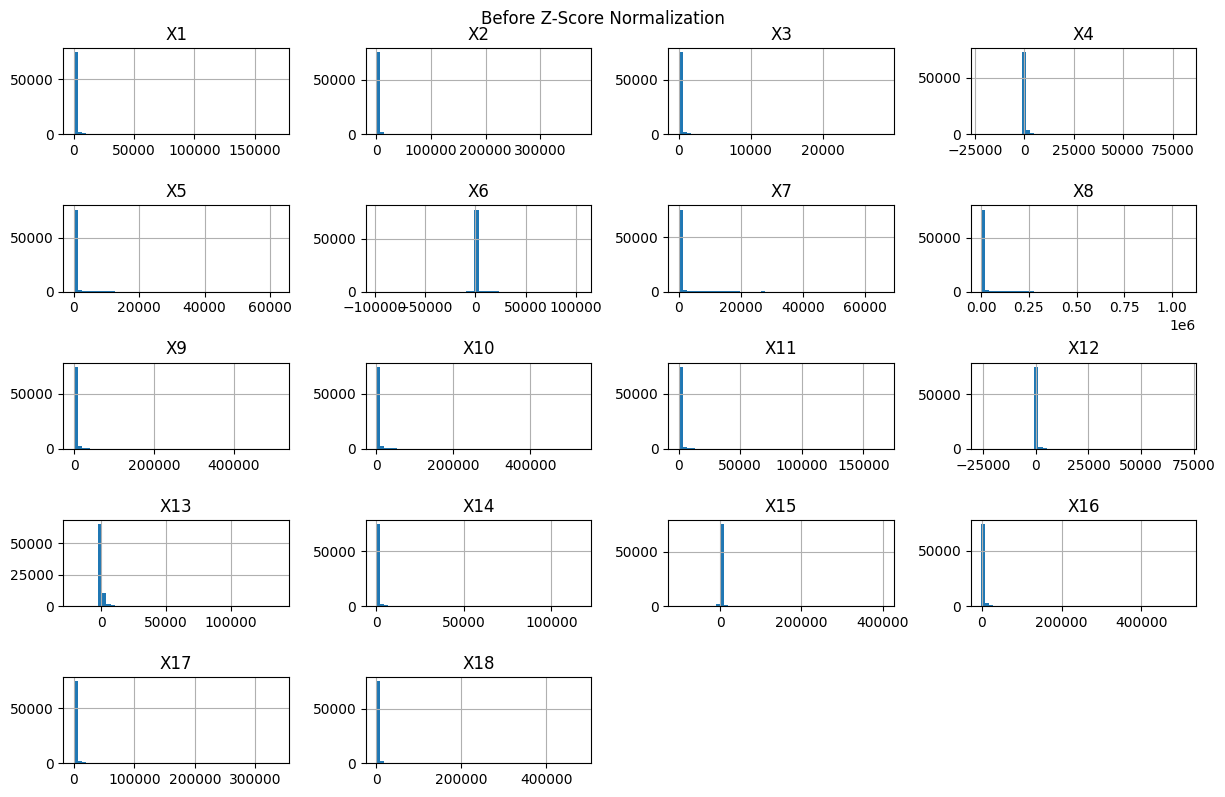

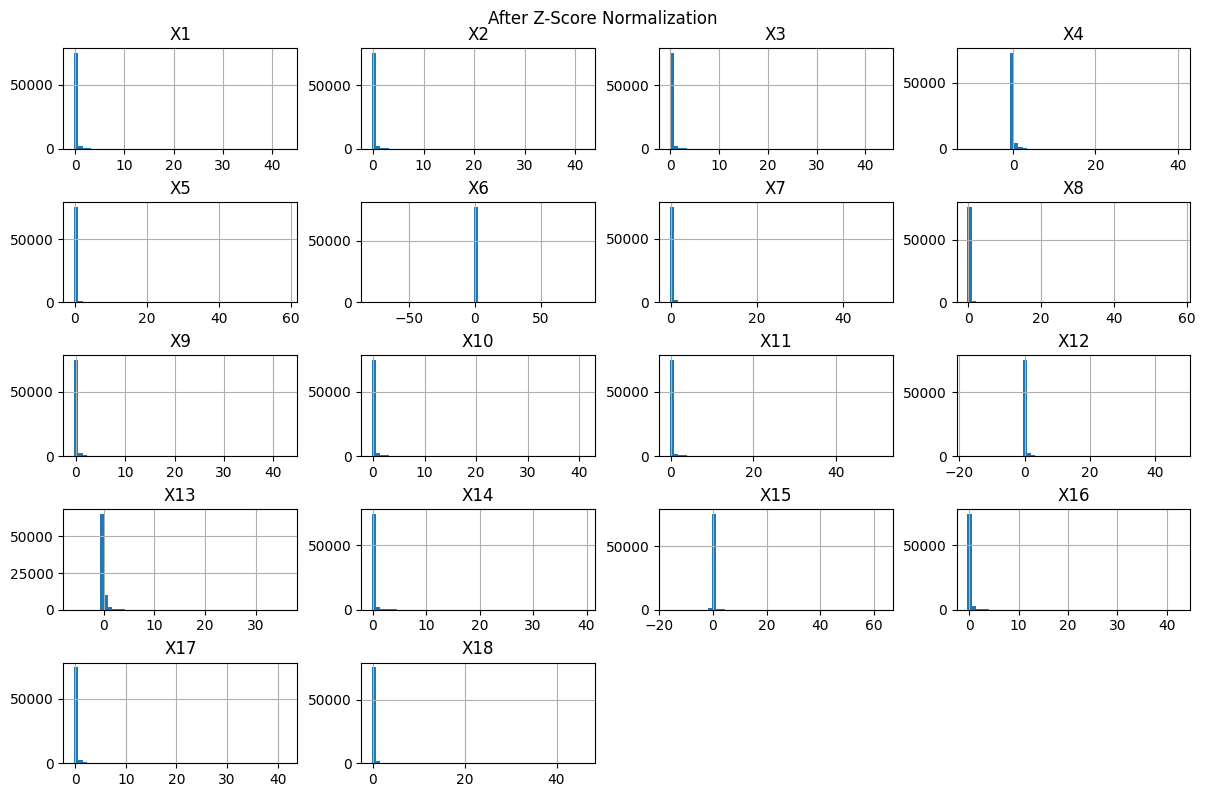

In [6]:
# Z-Score Normalization

df_z_score = df.copy()

columns_to_normalize = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6',
                       'X7', 'X8', 'X9', 'X10', 'X11', 'X12',
                       'X13', 'X14', 'X15', 'X16', 'X17', 'X18']

# Visualize the data before the transformation
df_z_score[columns_to_normalize].hist(bins=50, figsize=(12, 8))
plt.suptitle('Before Z-Score Normalization')
plt.tight_layout(pad=0.5)
plt.show()

# Apply the z-score transformation
for column in columns_to_normalize:
    mean = df_z_score[column].mean()
    std = df_z_score[column].std()
    df_z_score[column] = (df_z_score[column] - mean) / std

# Visualize the data after the transformation
df_z_score[columns_to_normalize].hist(bins=50, figsize=(12, 8))
plt.suptitle('After Z-Score Normalization')
plt.tight_layout(pad=0.5)
plt.show()

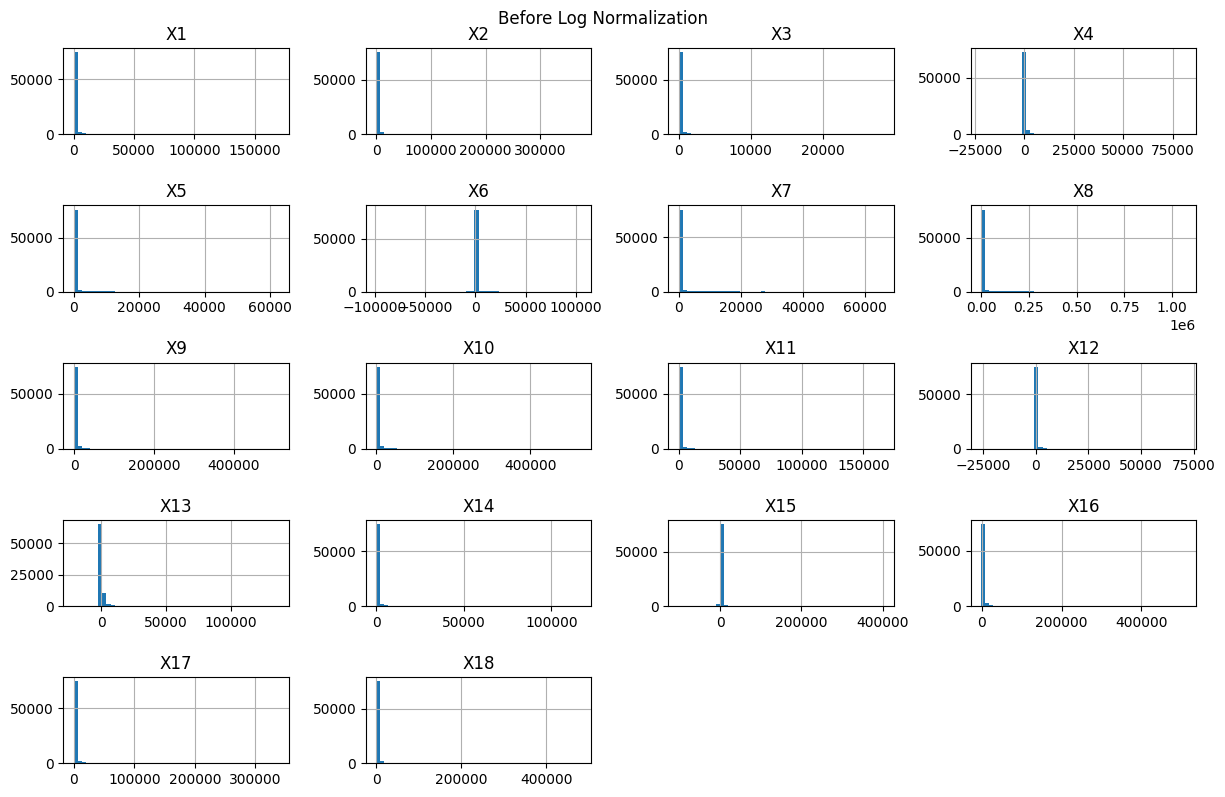

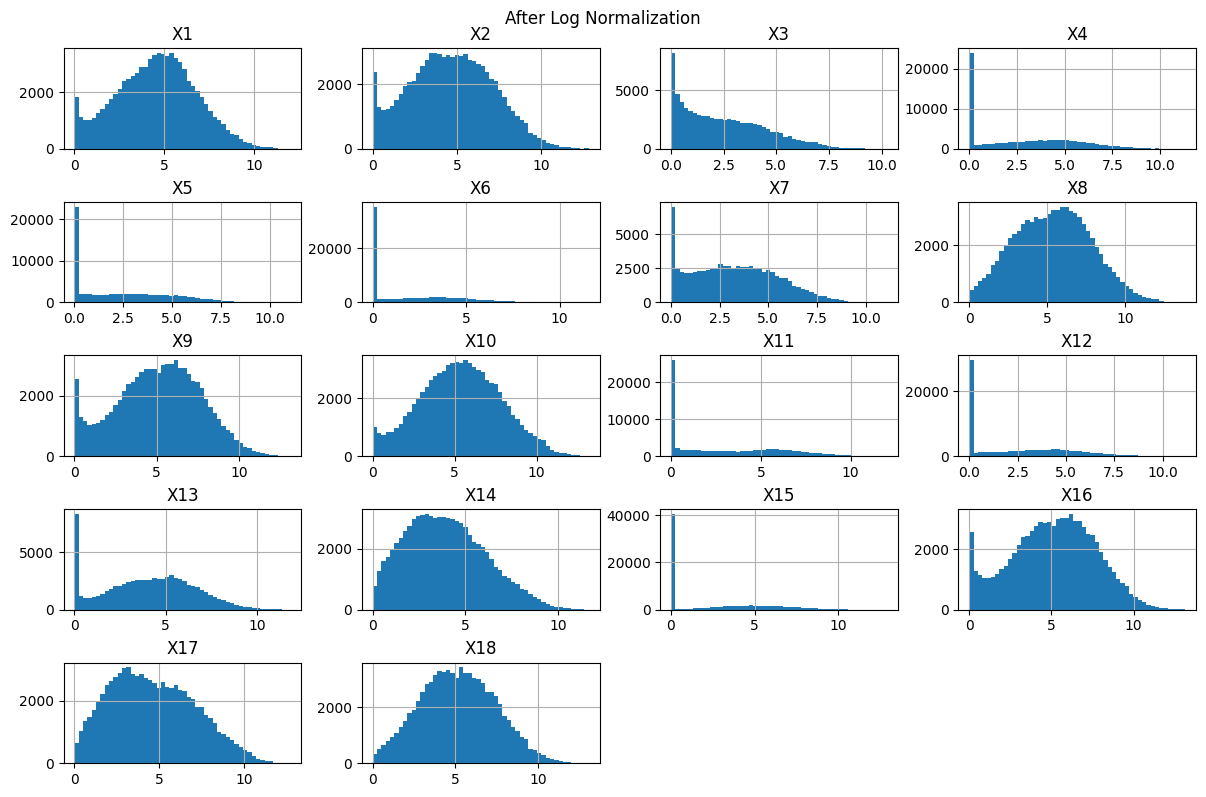

In [7]:
# Log Normalization (Works the Best Out of all the Normalization Techniques Used)

df_log = df.copy()

columns_to_normalize = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6',
                       'X7', 'X8', 'X9', 'X10', 'X11', 'X12',
                       'X13', 'X14', 'X15', 'X16', 'X17', 'X18']

# Visualize the data before applying the transformation
df_log[columns_to_normalize].hist(bins=50, figsize=(12, 8))
plt.suptitle('Before Log Normalization')
plt.tight_layout(pad=0.5)
plt.show()

# Apply the log transformation
for column in columns_to_normalize:
    df_log[column] = df_log[column].apply(lambda x: np.log1p(x) if x > 0 else 0)

# Replace any remaining inf values with NaN
df_log.replace([np.inf, -np.inf], np.nan, inplace=True)

# Visualize the data after the transformation
df_log[columns_to_normalize].hist(bins=50, figsize=(12, 8))
plt.suptitle('After Log Normalization')
plt.tight_layout(pad=0.5)
plt.show()

# df is now the original dataframe with log-transformed values
df = df_log

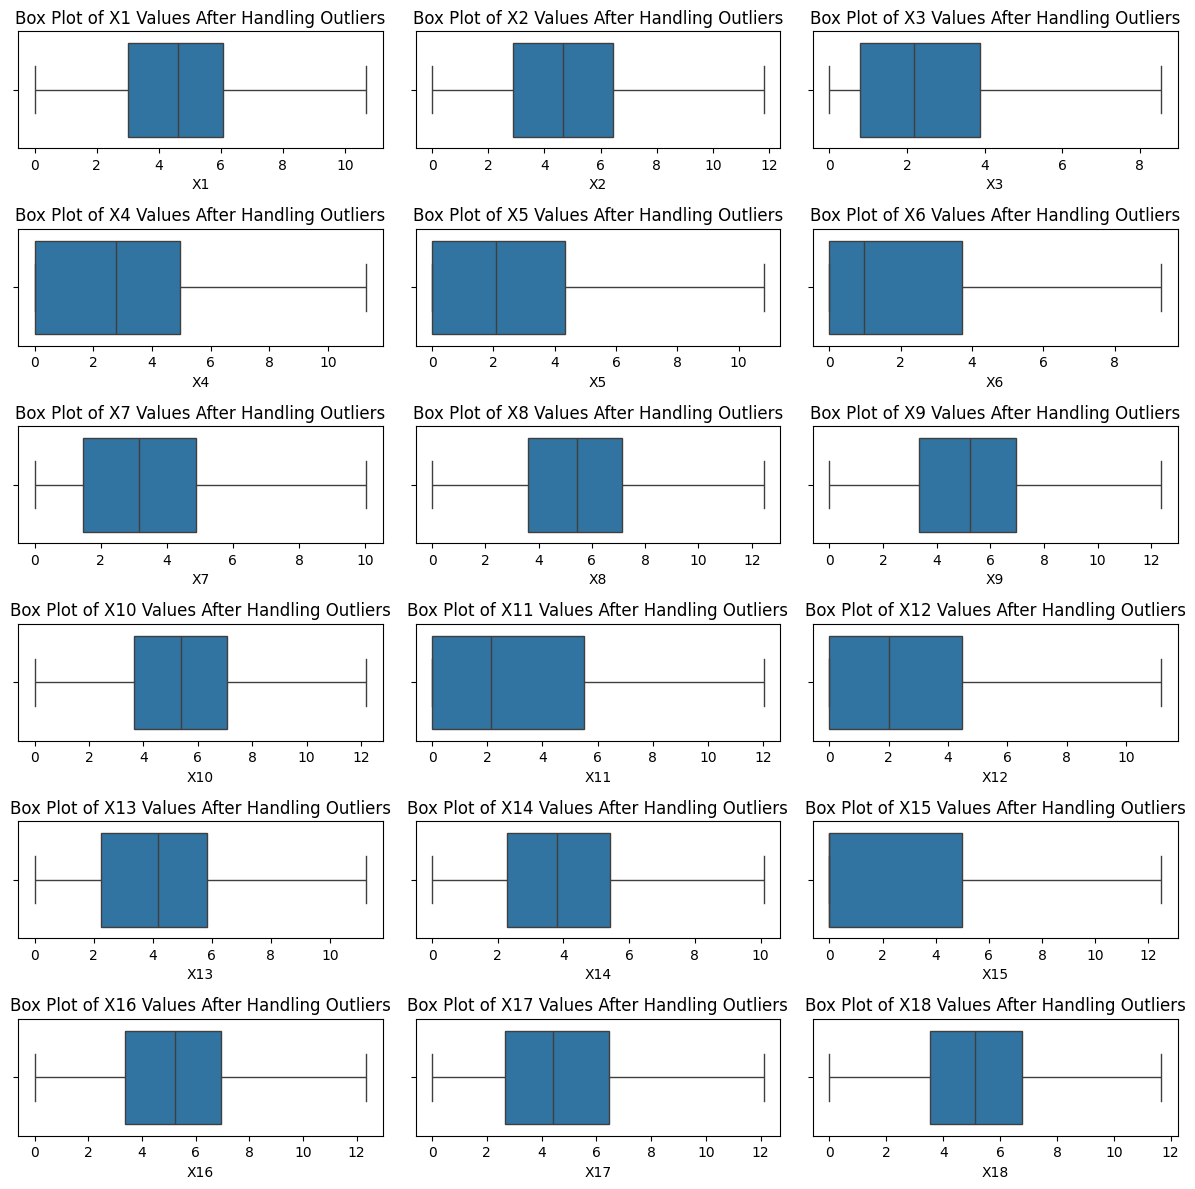

In [8]:
# Outlier Detection

features_to_plot = df.columns[df.columns != 'status_encoding']

for feature in features_to_plot:
    Q1 = df[feature].quantile(0.25)
    Q2 = df[feature].quantile(0.50)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lowerBound = Q1 - 1.5 * IQR
    upperBound = Q3 + 1.5 * IQR
    df[feature] = df[feature].clip(lower=lowerBound, upper=upperBound)

num_features = len(features_to_plot)
num_cols = 3
num_rows = math.ceil(num_features / num_cols)

plt.figure(figsize=(12, 2 * num_rows))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature} Values After Handling Outliers')
plt.tight_layout()
plt.show()

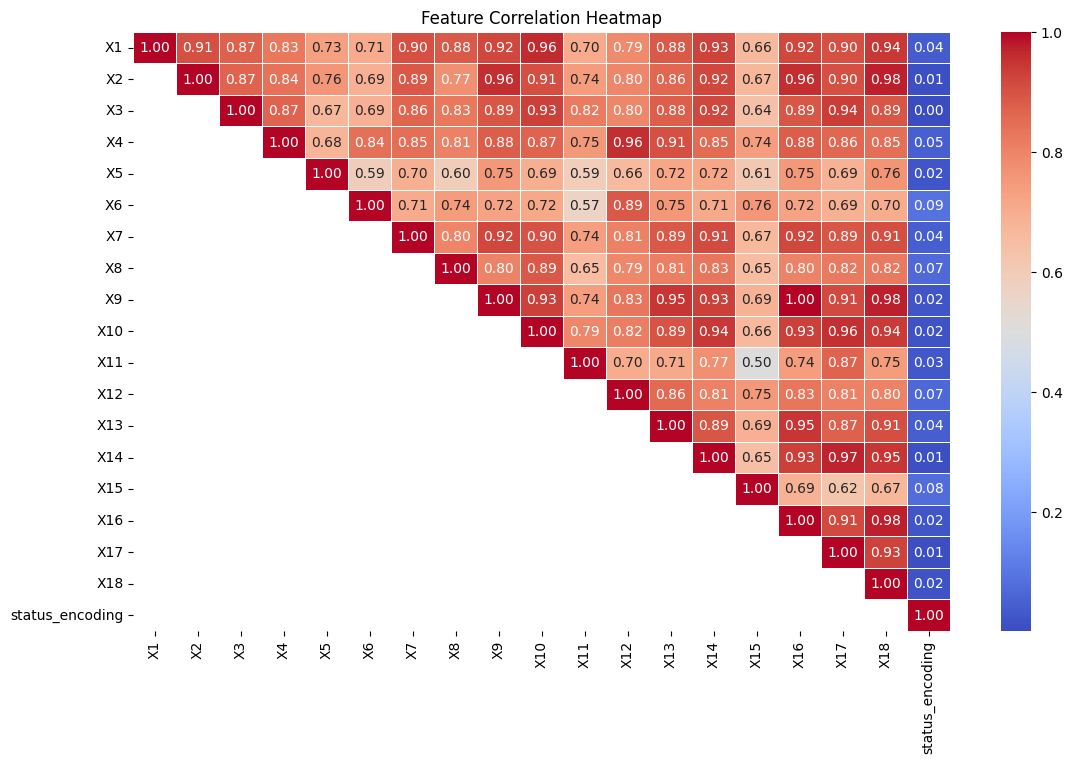

Dropped columns: ['X2', 'X3', 'X4', 'X7', 'X8', 'X9', 'X10', 'X12', 'X13', 'X14', 'X16', 'X17', 'X18']


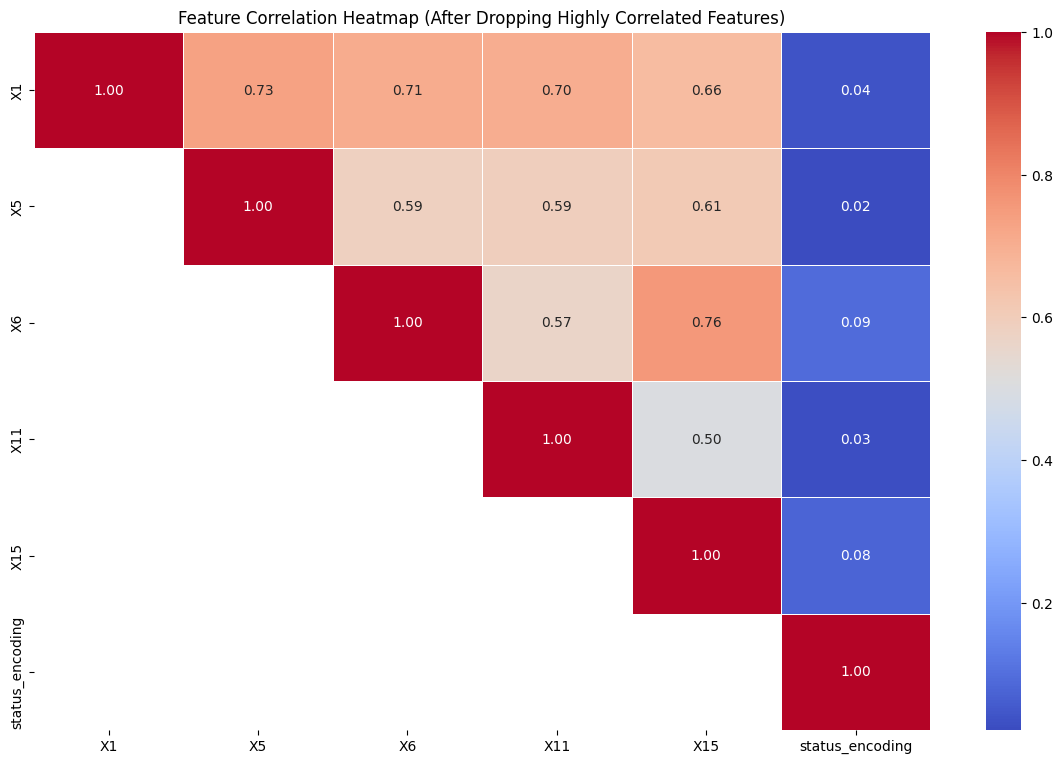

In [9]:
# Feature Selection Heatmap (The Best Method)

# Calculate the correlation matrix
correlation_matrix = df.corr().abs()

# Create a mask for the lower triangle to avoid the mirror values
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Invert the mask to keep the upper triangle
mask = np.invert(mask)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.tight_layout(pad=2.0)
plt.show()

# Select upper triangle of the correlation matrix
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find the index of feature columns with a correlation greater than the threshold
threshold = 0.85
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# Drop those features
df_reduced = df.drop(columns=to_drop)

print(f"Dropped columns: {to_drop}")

# Recalculate the correlation matrix after dropping the features
correlation_matrix_reduced = df_reduced.corr().abs()

# Create a mask for the lower triangle to avoid the mirror values
mask_reduced = np.triu(np.ones_like(correlation_matrix_reduced, dtype=bool))

# Invert the mask to keep the upper triangle
mask_reduced = np.invert(mask_reduced)

# Create a heatmap with the updated correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_reduced, mask=mask_reduced, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap (After Dropping Highly Correlated Features)')
plt.tight_layout(pad=2.0)
plt.show()

In [ ]:
"""
# Feature Selection Variance Inflation Factor (OLD VERSION)

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns

    # Calculate VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Drop any columns with zero or near-zero variance before calculating VIF
def drop_zero_variance_features(df):
    non_constant_columns = [col for col in df.columns if df[col].std() > 1e-10]  # threshold for near-zero variance
    return df[non_constant_columns]

# Check for near-zero variance
df_non_constant = drop_zero_variance_features(df)

# Calculate VIF
vif_df = calculate_vif(df_non_constant)

# Display VIF DataFrame
print(vif_df)

# Drop features with VIF > 5 (or another threshold)
df_reduced = df.drop(columns=vif_df[vif_df['VIF'] > 5]['feature'])

print(f"Dropped columns: {vif_df[vif_df['VIF'] > 5]['feature'].tolist()}")
"""

"""
# This works almost the best
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns

    # Calculate VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Drop any columns with zero or near-zero variance before calculating VIF
def drop_zero_variance_features(df):
    non_constant_columns = [col for col in df.columns if df[col].std() > 1e-10]  # threshold for near-zero variance
    return df[non_constant_columns]

# Drop features with perfect multicollinearity
def drop_perfect_multicollinearity(df):
    corr_matrix = df.corr().abs()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find columns with perfect correlation
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] == 1.0)]
    return df.drop(columns=to_drop)

# Check for near-zero variance
df_non_constant = drop_zero_variance_features(df)

# Check for perfect multicollinearity
df_non_collinear = drop_perfect_multicollinearity(df_non_constant)

# Calculate VIF
vif_df = calculate_vif(df_non_collinear)

# Display VIF DataFrame
print("VIF before dropping high VIF features:")
print(vif_df)

# Drop features with VIF > 5 (or another threshold)
threshold = 5
features_to_drop = vif_df[vif_df['VIF'] > threshold]['feature']
df_reduced = df_non_collinear.drop(columns=features_to_drop)

# Display the reduced DataFrame
print(f"Dropped columns: {features_to_drop.tolist()}")
print("DataFrame after dropping high VIF features:")
print(df_reduced.head())

# Check if there are multiple features remaining
if df_reduced.shape[1] > 1:
    # Recalculate VIF after dropping high VIF features
    vif_df_reduced = calculate_vif(df_reduced)
    print("VIF after dropping high VIF features:")
    print(vif_df_reduced)
else:
    print("Not enough features remaining to calculate VIF.")
"""

'\n# This works almost the best\nimport pandas as pd\nimport numpy as np\nfrom statsmodels.stats.outliers_influence import variance_inflation_factor\n\n# Function to calculate VIF\ndef calculate_vif(df):\n    vif_data = pd.DataFrame()\n    vif_data["feature"] = df.columns\n    \n    # Calculate VIF for each feature\n    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]\n    return vif_data\n\n# Drop any columns with zero or near-zero variance before calculating VIF\ndef drop_zero_variance_features(df):\n    non_constant_columns = [col for col in df.columns if df[col].std() > 1e-10]  # threshold for near-zero variance\n    return df[non_constant_columns]\n\n# Drop features with perfect multicollinearity\ndef drop_perfect_multicollinearity(df):\n    corr_matrix = df.corr().abs()\n    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))\n    \n    # Find columns with perfect correlation\n    to_drop = [column for c

In [ ]:
# Feature Selection by Feature Importance (Random Forest)

         X1        X5        X6       X11       X15  status_encoding
0  0.749119  1.394333  0.730806 -0.982470  1.150879                0
1  1.478968  1.699760  1.804455  2.104993 -0.840255                0
2  0.416184  1.104210  0.575363 -1.008402  0.744977                0
3  1.715795  2.266583  1.917170  1.912754  2.188324                0
4 -0.247070 -0.132677  0.094677  0.346547  0.105886                0
5  0.749493  0.211465  1.518772  1.450642  1.571579                0
6  0.543668  0.095328 -0.861097  1.318644  0.620193                0
7  0.749814 -1.060516 -0.861097 -1.008402 -0.840255                0
8 -0.145014 -0.808775  0.083053 -1.008402 -0.840255                0
9 -0.235915 -1.060516 -0.861097 -1.006362 -0.840255                0
/n


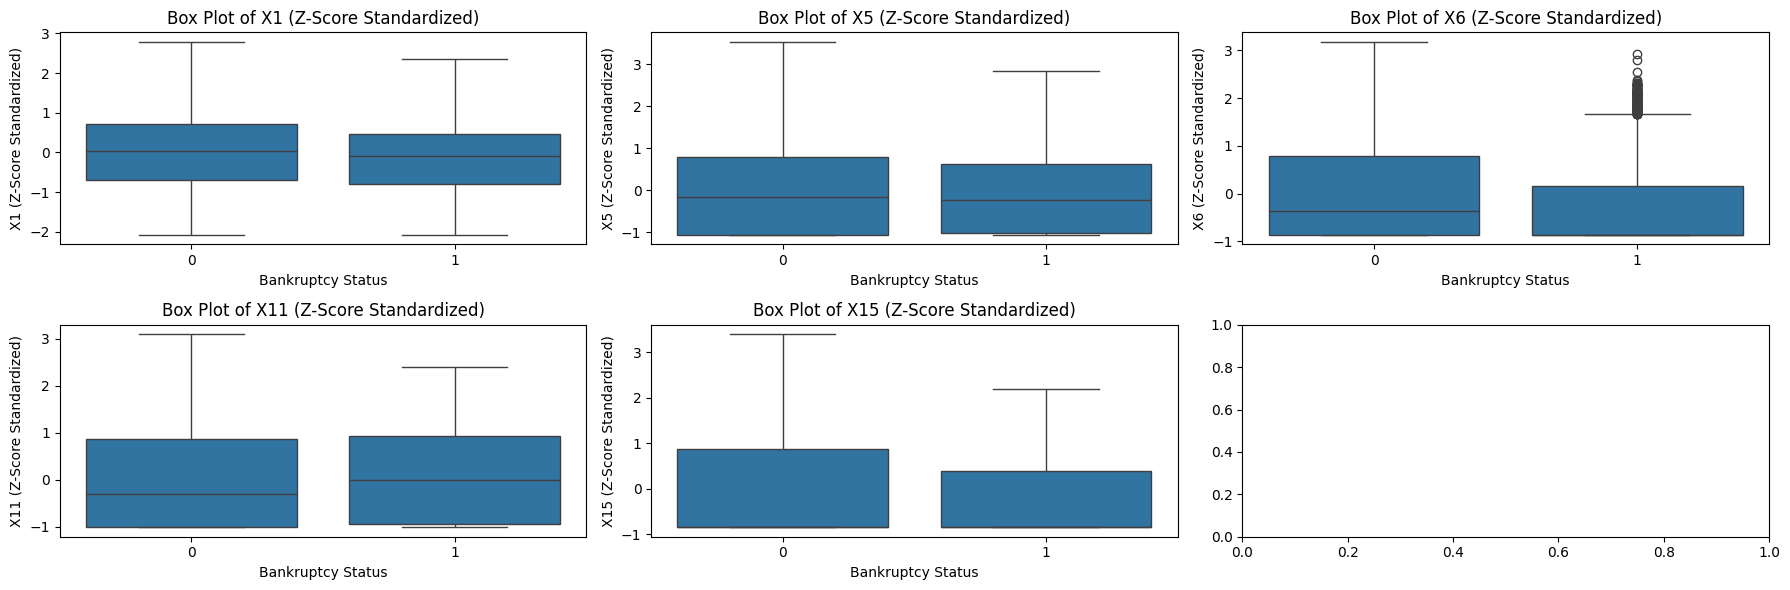

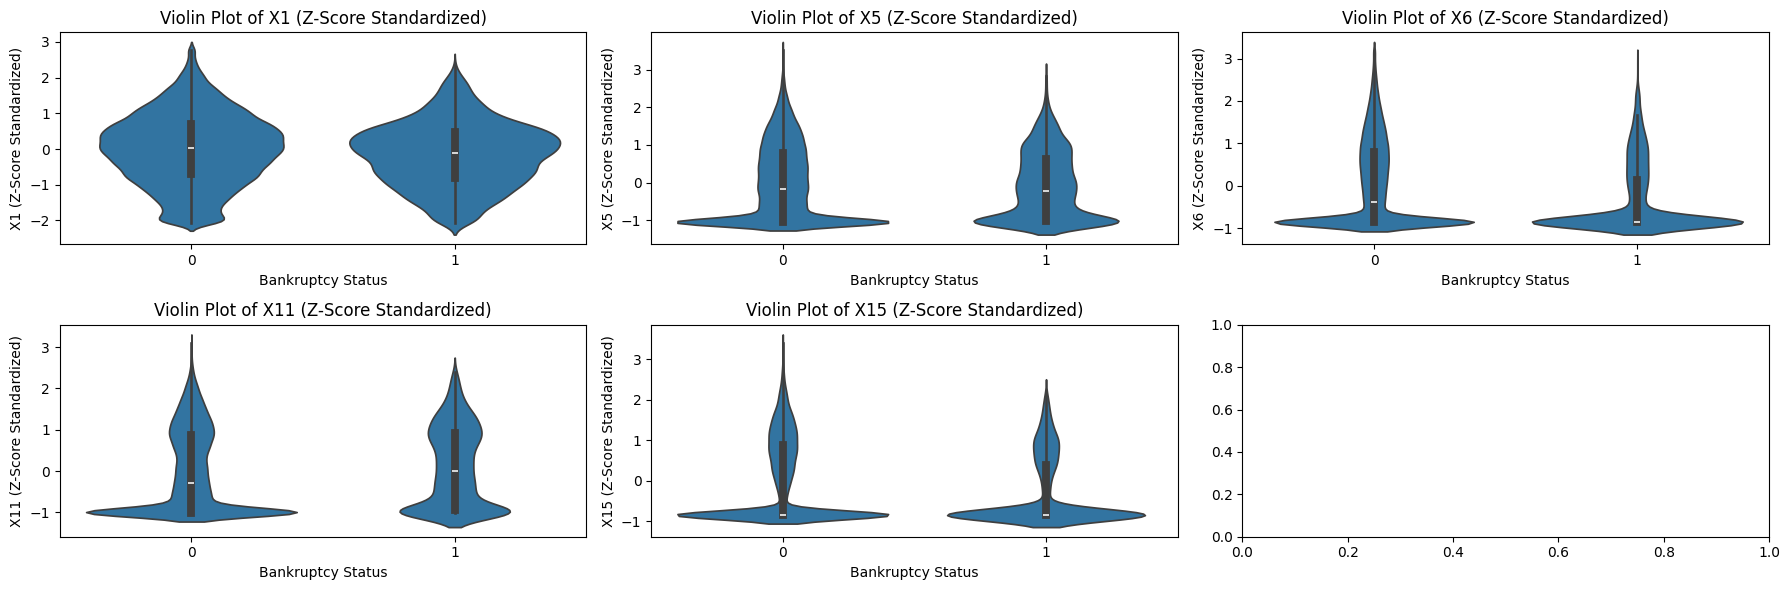

In [10]:
# Data Scaling/Standardization with Z-Score Scaling

scaler = StandardScaler()

X = df_reduced.iloc[:, :-1]
y = df_reduced['status_encoding']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21, test_size=0.20, shuffle=True)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

train_scaled = pd.concat([pd.DataFrame(X_train_scaled, columns=X.columns), pd.DataFrame(y_train.reset_index(drop=True), columns =['status_encoding'])], axis=1)
test_scaled = pd.concat([pd.DataFrame(X_test_scaled, columns=X.columns), pd.DataFrame(y_test.reset_index(drop=True), columns =['status_encoding'])], axis=1)
df_scaled = pd.concat([train_scaled, test_scaled], axis=0)
print(df_scaled.head(10))

print('/n')

diagram_columns = 3
attribute_columns = df_scaled.shape[1] - 1
diagram_rows = math.ceil(attribute_columns / diagram_columns)

row_index = 0
column_index = 0
fig, axes = plt.subplots(diagram_rows, diagram_columns, figsize=(18, diagram_rows * 3))
for column in df_scaled.columns[:-1]:
    sns.boxplot(x='status_encoding', y=column, data=df_scaled, ax=axes[row_index, column_index])
    axes[row_index, column_index].set_title(f'Box Plot of {column} (Z-Score Standardized)')
    axes[row_index, column_index].set_xlabel('Bankruptcy Status')
    axes[row_index, column_index].set_ylabel(f'{column} (Z-Score Standardized)')
    column_index += 1
    if column_index == diagram_columns:
        row_index += 1
        column_index = 0
plt.tight_layout()
plt.show()

print('\n')

row_index = 0
column_index = 0
fig, axes = plt.subplots(diagram_rows, diagram_columns, figsize=(18, diagram_rows * 3))
for column in df_scaled.columns[:-1]:
    sns.violinplot(x='status_encoding', y=column, data=df_scaled, ax=axes[row_index, column_index])
    axes[row_index, column_index].set_title(f'Violin Plot of {column} (Z-Score Standardized)')
    axes[row_index, column_index].set_xlabel('Bankruptcy Status')
    axes[row_index, column_index].set_ylabel(f'{column} (Z-Score Standardized)')
    column_index += 1
    if column_index == diagram_columns:
        row_index += 1
        column_index = 0
plt.tight_layout()
plt.show()

In [11]:
# Undersampling the majority class (class 0, i.e. the "alive" class) to account for the data imbalance

from sklearn.utils import resample

df_temp = train_scaled.copy()

df_class_0 = df_temp[df_temp['status_encoding'] == 0]
df_class_1 = df_temp[df_temp['status_encoding'] == 1]

df_class_0_undersampled = resample(df_class_0, replace=False, n_samples=len(df_class_1), random_state=21)

df_balanced = pd.concat([df_class_0_undersampled, df_class_1], axis=0)

df_balanced = df_balanced.sample(frac=1, random_state=21).reset_index(drop=True)

print(df_balanced['status_encoding'].value_counts())

X_train_balanced = df_balanced.drop(columns=['status_encoding']).to_numpy()
y_train_balanced = df_balanced['status_encoding'].to_numpy()

print(type(X_train_balanced))

"""

*Note to Lucas*

Undersampling currently doesn't work that well. We could also try oversampling, i.e. SMOTE, or hybrid sampling,
i.e. SMOTTEEN (SMOTE + Edited Nearest Neighbors) here after in this cell and modify what's being used below.

"""

status_encoding
1    4203
0    4203
Name: count, dtype: int64
<class 'numpy.ndarray'>


"\n\n*Note to Lucas*\n\nUndersampling currently doesn't work that well. We could also try oversampling, i.e. SMOTE, or hybrid sampling, \ni.e. SMOTTEEN (SMOTE + Edited Nearest Neighbors) here after in this cell and modify what's being used below.\n\n"

In [24]:
# Random Oversampling of the minority class

# Separate the two classes in the training data
df_class_0 = df_temp[df_temp['status_encoding'] == 0]
df_class_1 = df_temp[df_temp['status_encoding'] == 1]

# Perform oversampling on class 1
df_class_1_oversampled = resample(df_class_1,
                                  replace=True, # Sample with replacement
                                  n_samples=len(df_class_0), # Match the majority class
                                  random_state=21) # Ensure reproducibility

# Combine the oversampled class 1 with the majority class
df_balanced = pd.concat([df_class_0, df_class_1_oversampled], axis=0)

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=21).reset_index(drop=True)

# Verify the class balance
print('Class distribution after oversampling:')
print(df_balanced['status_encoding'].value_counts())

# Prepare the balanced training data
X_train_balanced = df_balanced.drop(columns=['status_encoding']).to_numpy()
y_train_balanced = df_balanced['status_encoding'].to_numpy()


Class distribution after oversampling:
status_encoding
1    58742
0    58742
Name: count, dtype: int64


In [26]:
#Applying SMOTE for hybrid sampling
#!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

# Applying SMOTE to balance the training data
smote = SMOTE(random_state=21)

# Balancing the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train_balanced, y_train_balanced)

# Checking the balance of the new dataset
print("After applying SMOTE:")
print(pd.Series(y_train_smote).value_counts())

X_train_balanced = X_train_smote
y_train_balanced = y_train_smote


After applying SMOTE:
1    58742
0    58742
Name: count, dtype: int64


In [27]:
# Applying the Logistic Regression Model

param_grid = {
    'penalty': ['l1', 'l2'], # L1 and L2 regularization
    'C': [0.01, 0.1, 1, 10, 100], # C is 1 / lambda (i.e. the inverse of the regularization parameter)
    'max_iter': [100, 200, 300, 400] # The maximum number of iterations, which is similar, but not analogous to epochs
}

model = LogisticRegression(solver='liblinear')

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

grid_result = grid.fit(X_train_balanced, y_train_balanced)

best_params = grid_result.best_params_
best_score = grid_result.best_score_

print('The Best Model\'s Hyper-Parameters:', best_params)
print('Accuracy of the Best Model: {:.2f}%'.format(best_score * 100))

The Best Model's Hyper-Parameters: {'C': 0.01, 'max_iter': 200, 'penalty': 'l1'}
Accuracy of the Best Model: 61.36%


In [28]:
best_model = LogisticRegression(penalty=best_params['penalty'], C=best_params['C'], solver='liblinear', max_iter=best_params['max_iter'])

history = best_model.fit(X_train_balanced, y_train_balanced) # Can use history for plotting useful graphs

y_pred = best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

print('Accuracy of the Best Model on the Testing Data with Default Threshold: {:.2f}%'.format(accuracy * 100))

Accuracy of the Best Model on the Testing Data with Default Threshold: 56.89%


Accuracy of the Best Model on the Testing Data with Threshold 0.50: 56.89%
Precision of the Best Model on the Testing Data with Threshold 0.50: 9.24%
Recall of the Best Model on the Testing Data with Threshold 0.50: 64.31%
F1-Score of the Best Model on the Testing Data with Threshold 0.50: 16.16%
Accuracy of the Best Model With the Threshold 0.5: 56.89%


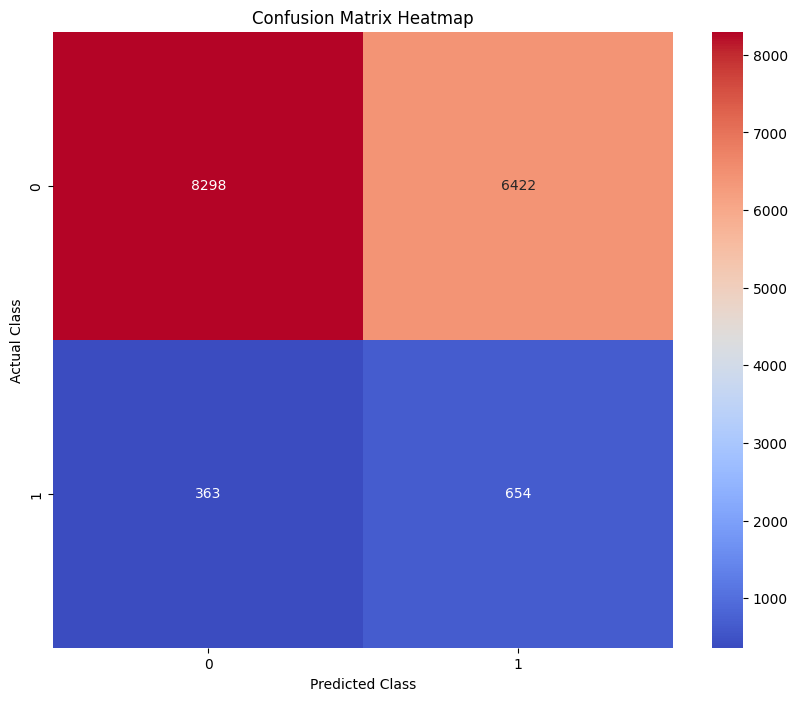

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]

threshold = 0.5

y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred_adjusted)
print('Accuracy of the Best Model on the Testing Data with Threshold {:.2f}: {:.2f}%'.format(threshold, accuracy * 100))

precision = precision_score(y_test, y_pred_adjusted)
print('Precision of the Best Model on the Testing Data with Threshold {:.2f}: {:.2f}%'.format(threshold, precision * 100))

recall = recall_score(y_test, y_pred_adjusted)
print('Recall of the Best Model on the Testing Data with Threshold {:.2f}: {:.2f}%'.format(threshold, recall * 100))

f1 = f1_score(y_test, y_pred_adjusted)
print('F1-Score of the Best Model on the Testing Data with Threshold {:.2f}: {:.2f}%'.format(threshold, f1 * 100))

print(f'Accuracy of the Best Model With the Threshold {threshold}: {accuracy * 100:.2f}%')

cm = confusion_matrix(y_test, y_pred_adjusted)

# Visualize correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

In [ ]:
"""

*Note to Lucas*

We could add an ROC curve, or some other graphical information about our model.

"""

'\n\n*Note to Lucas*\n\nWe could add an ROC curve, or some other graphical information about our model.\n\n'